In [1]:
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [123]:
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [124]:
store.shape

(1115, 10)

In [4]:
train = pd.read_csv('train.csv', index_col='Date', parse_dates = True)
train.head()

C:\Users\snehi\AppData\Local\Temp\ipykernel_31040\1323303590.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv', index_col='Date', parse_dates = True)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [5]:
test = pd.read_csv('test.csv')
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [125]:
# Checking train data
train_head_tail = pd.concat([train.head(5), train.tail(5)])
train_head_tail

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263.0,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064.0,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314.0,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995.0,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822.0,559,1,1,0,1,2015,7,31,31,8.626118
2013-01-01,1111,2,0.0,0,0,0,a,1,2013,1,1,1,NaN
2013-01-01,1112,2,0.0,0,0,0,a,1,2013,1,1,1,NaN
2013-01-01,1113,2,0.0,0,0,0,a,1,2013,1,1,1,NaN
2013-01-01,1114,2,0.0,0,0,0,a,1,2013,1,1,1,NaN


In [7]:
train.shape

(1017209, 8)

In [8]:
train.index.year

Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
      dtype='int32', name='Date', length=1017209)

In [9]:
# Extracting year, month, day and week, and making new column
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.isocalendar().week

train['SalePerCustomer'] = train['Sales']/train['Customers']

In [10]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [11]:
# Checking data when the stores were closed
train_store_closed = train[(train.Open == 0)]
train_store_closed.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


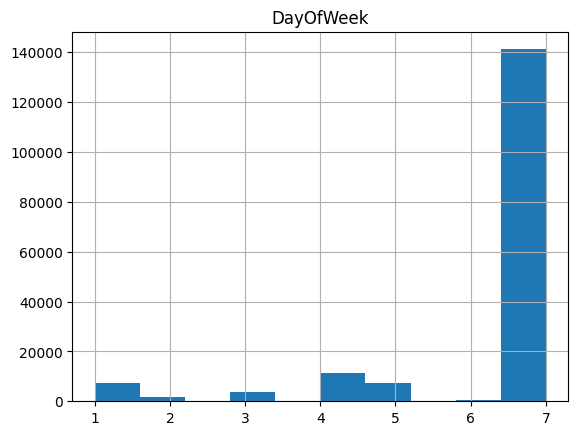

In [12]:
# Checking days when the stores were closed
train_store_closed.hist('DayOfWeek');

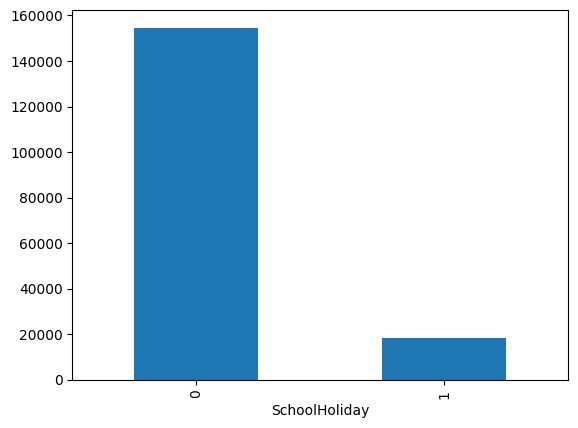

In [13]:
# Checking whether there was a school holiday when the store was closed
train_store_closed['SchoolHoliday'].value_counts().plot(kind='bar');

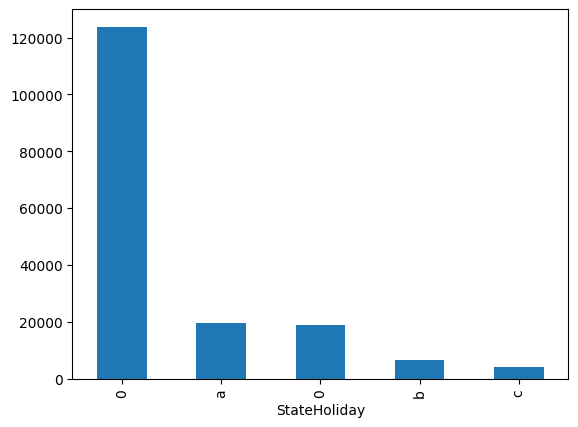

In [14]:
# Checking whether there was a state holiday when the store was closed
train_store_closed['StateHoliday'].value_counts().plot(kind='bar');

In [15]:
# Checking missing values in train set - no missing value
train.isnull().sum()

Store                   0
DayOfWeek               0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
SalePerCustomer    172869
dtype: int64

In [16]:
# No. of days with closed stores
train[(train.Open == 0)].shape[0]

172817

In [17]:
# No. of days when store was opened but zero sales - might be because of external factors or refurbishmnent
train[(train.Open == 1) & (train.Sales == 0)].shape[0]

54

In [18]:
# Checking store data
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
# Checking missing values in store data 
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [20]:
# Replacing missing values for Competiton distance with median
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)

In [21]:
# No info about other columns - so replcae by 0
store.fillna(0, inplace=True)

In [22]:
# Checking test data
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [23]:
# Checking missing values
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [24]:
# Assuming stores open in test
test.fillna(1, inplace=True)

In [101]:
# Joining the tables
train_store_joined = pd.merge(train, store, on='Store', how='inner')
train_store_joined.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263.0,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020.0,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782.0,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011.0,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102.0,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [102]:
# Distribution of sales and customers across store types
train_store_joined.groupby('StoreType')[['Customers', 'Sales', 'SalePerCustomer']].sum().sort_values('Sales', ascending=False)

,Customers,Sales,SalePerCustomer
StoreType,,,
a,363541434,3.165335e+09,4.043129e+06
d,156904995,1.765393e+09,2.918350e+06
c,92129705,7.832214e+08,9.744876e+05
b,31465621,1.592314e+08,7.987612e+04


In [103]:
# Closed and zero-sales obseravtions
train_store_joined[(train_store_joined.Open ==0) | (train_store_joined.Sales==0)].shape

(172871, 22)

In [104]:
train_store_joined.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263.0,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020.0,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782.0,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011.0,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102.0,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [105]:
train_store_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  float64
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int32  
 9   Month                      1017209 non-null  int32  
 10  Day                        1017209 non-null  int32  
 11  WeekOfYear                 1017209 non-null  UInt32 
 12  SalePerCustomer            844340 non-null   float64
 13  StoreType   

In [94]:
# Open & Sales >0 stores
train_store_joined_open = train_store_joined[~((train_store_joined.Open ==0) | (train_store_joined.Sales==0))]

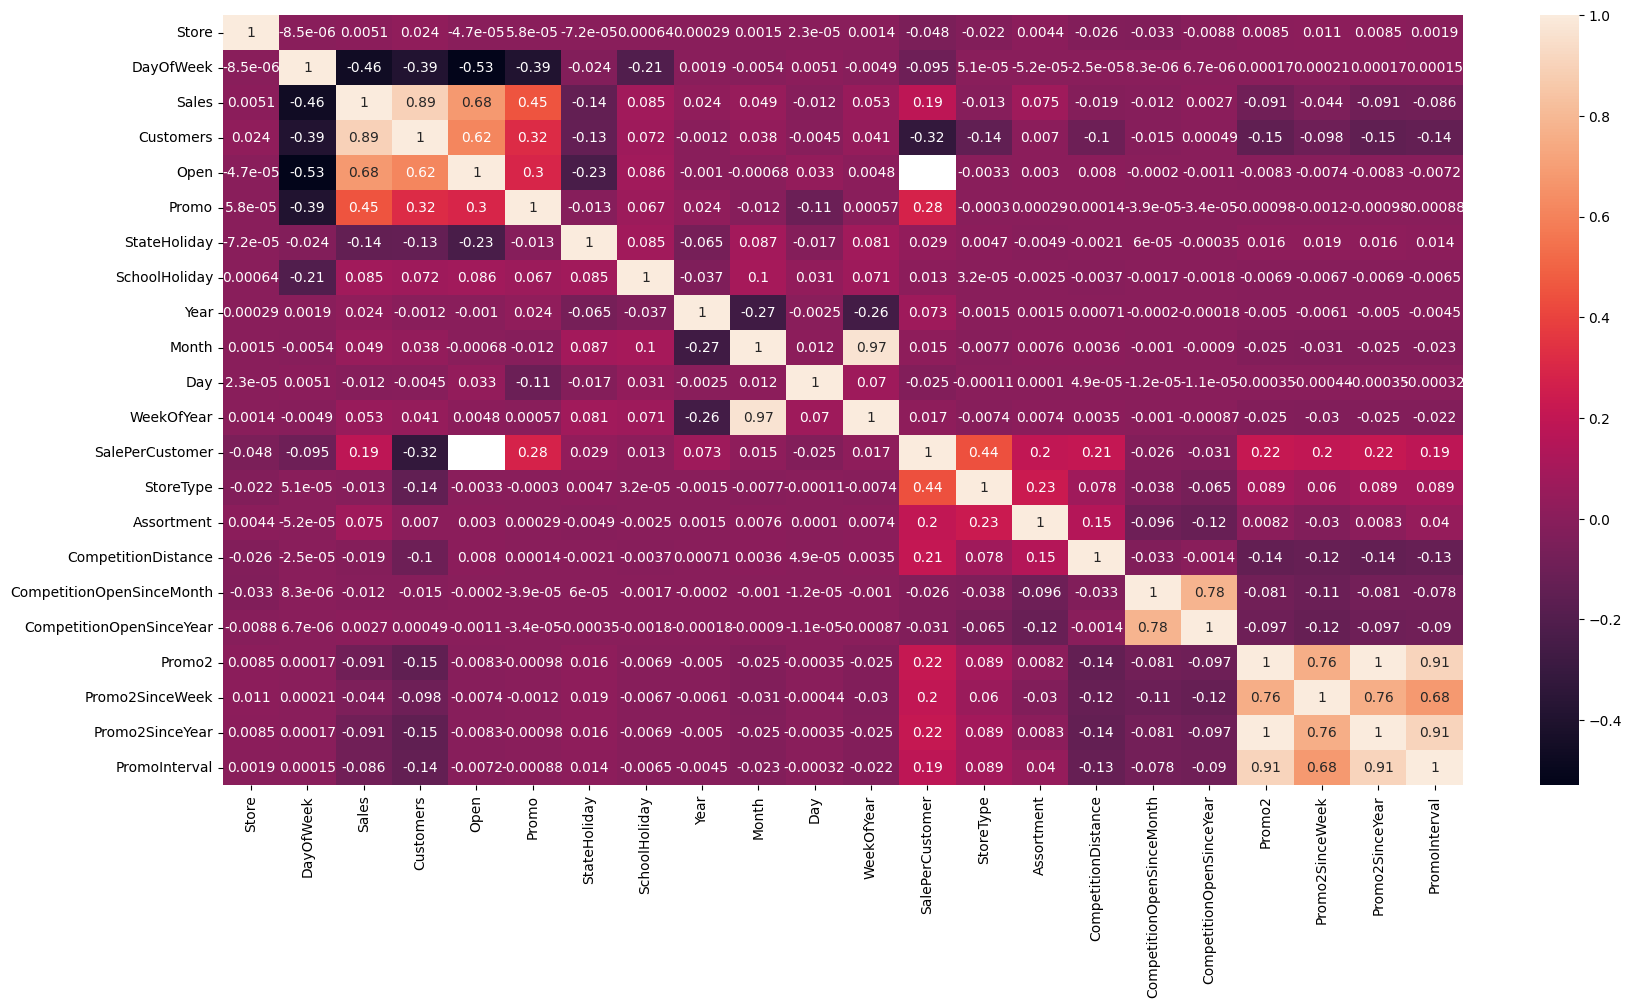

In [107]:
# Correlation
# train_store_joined = train_store_joined.drop(['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval'], axis=1)
train_store_joined["StoreType"] = train_store_joined["StoreType"].astype("category").cat.codes
train_store_joined["Assortment"] = train_store_joined["Assortment"].astype("category").cat.codes
train_store_joined["StateHoliday"] = train_store_joined["StateHoliday"].astype("category").cat.codes
train_store_joined["PromoInterval"] = train_store_joined["PromoInterval"].astype("category").cat.codes
plt.figure(figsize = (20, 10))
sns.heatmap(train_store_joined.corr(), annot = True);

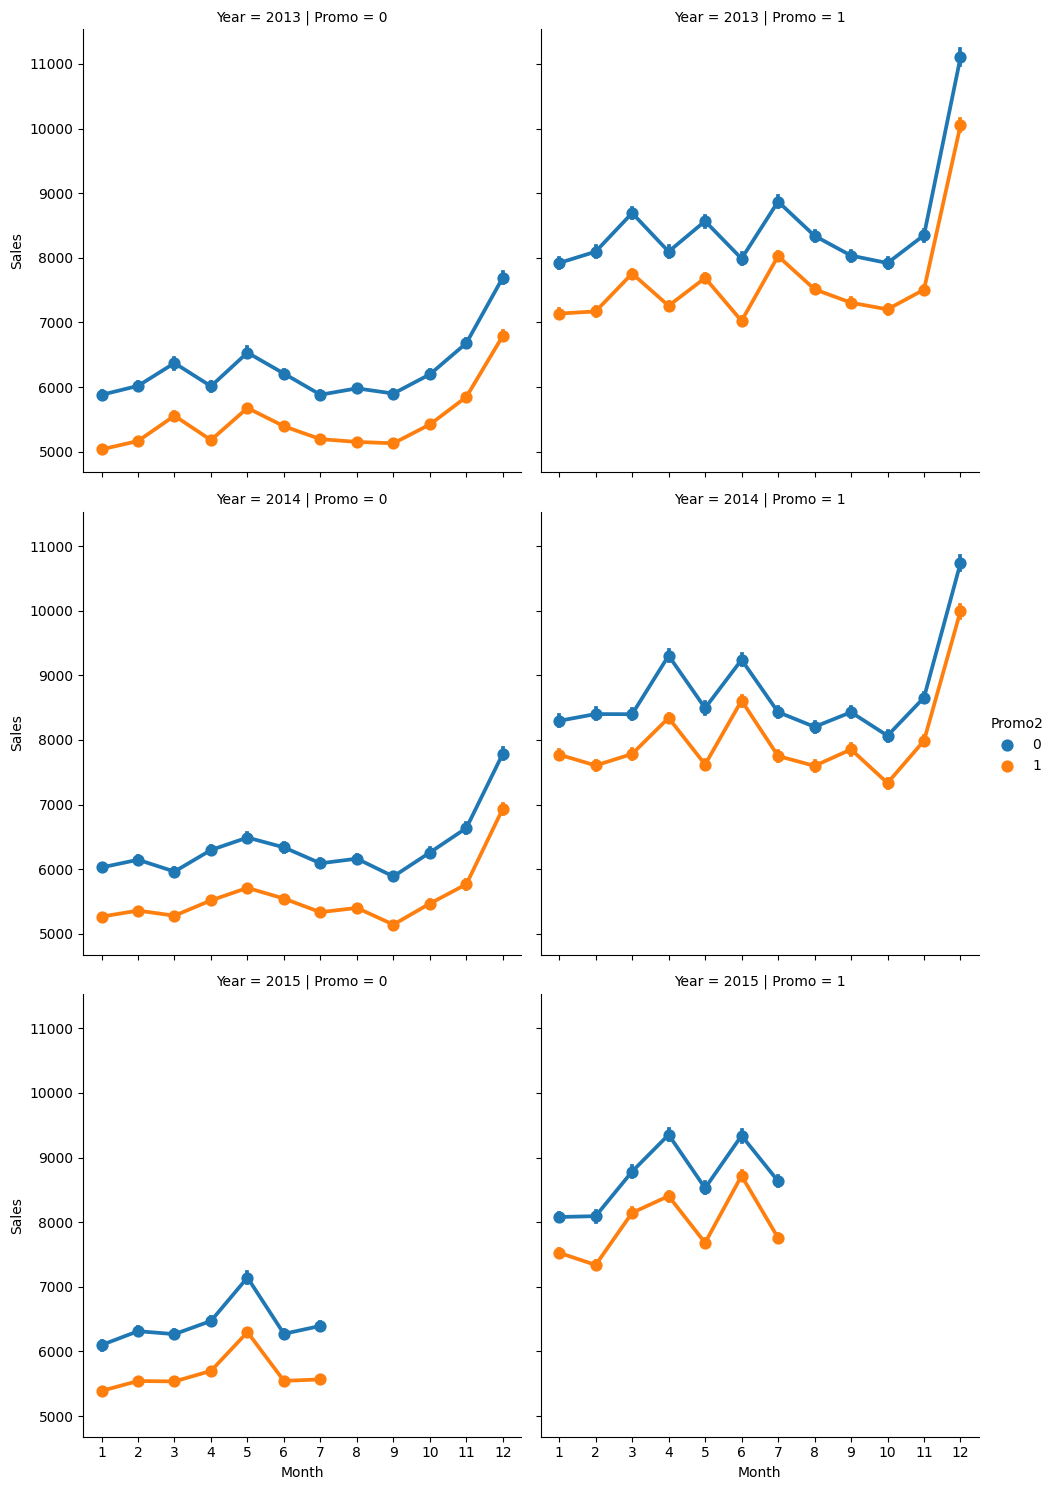

In [108]:
# Sales trend over the months
sns.catplot(data = train_store_joined_open, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year",
               kind="point"
             );

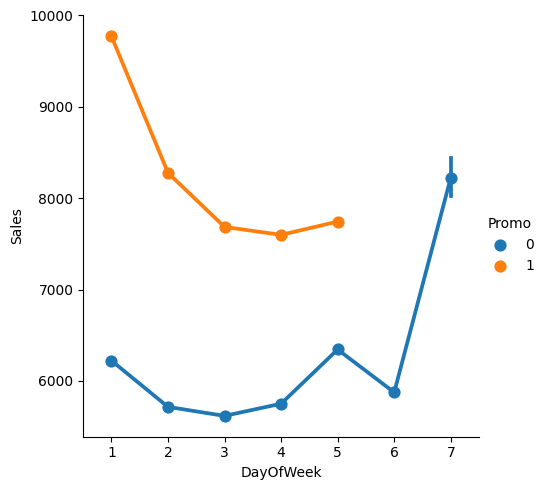

In [31]:
# Sales trend over days
sns.catplot(data = train_store_joined_open, x = "DayOfWeek", y = "Sales", hue = "Promo", kind="point");

 ## Time Series Analysis & Predictive Modelling

In [32]:
pd.plotting.register_matplotlib_converters()

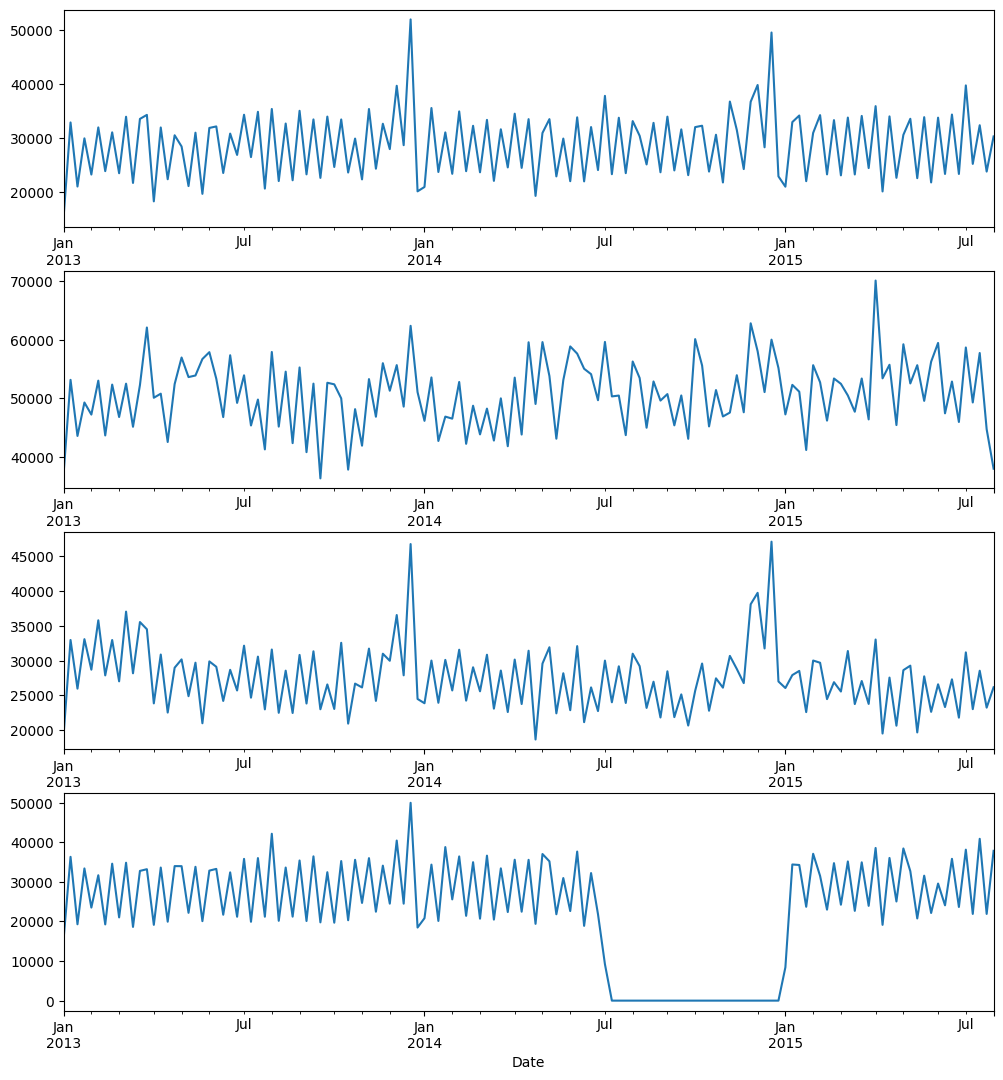

In [33]:
# Data Preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0

# Assigning one store from each category
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) 
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# Trend
sales_a.resample('W').sum().plot(ax = ax1)
sales_b.resample('W').sum().plot(ax = ax2)
sales_c.resample('W').sum().plot(ax = ax3)
sales_d.resample('W').sum().plot(ax = ax4);

In [122]:
sales_a

Date
2015-07-31    6064.0
2015-07-30    5567.0
2015-07-29    6402.0
2015-07-28    5671.0
2015-07-27    6627.0
               ...  
2013-01-05    2342.0
2013-01-04    4484.0
2013-01-03    4159.0
2013-01-02    4422.0
2013-01-01       0.0
Name: Sales, Length: 942, dtype: float64

In [34]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()

    # Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)

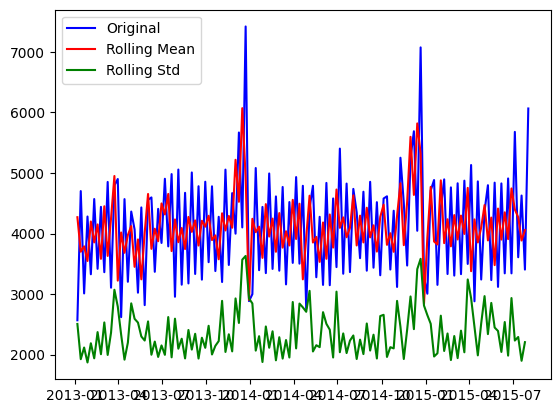

Results of Dickey-Fuller Test:
ADF Statistic: -6.218237
p-value: 0.000000
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583


In [35]:
# Testing stationarity of store type a
test_stationarity(sales_a)

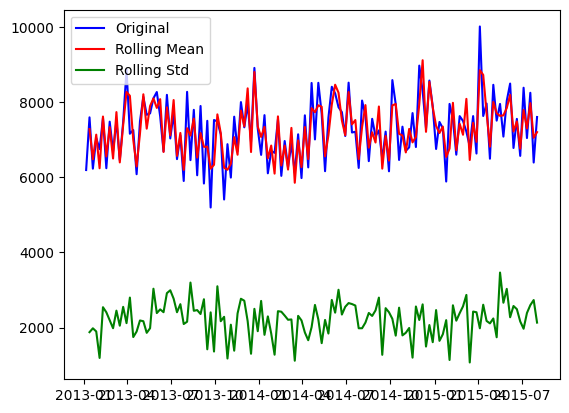

Results of Dickey-Fuller Test:
ADF Statistic: -5.660918
p-value: 0.000001
Critical Values:
1% -3.437485646962348
5% -2.8646901138095378
10% -2.568447319459459


In [36]:
#Testing stationarity of store type b
test_stationarity(sales_b)

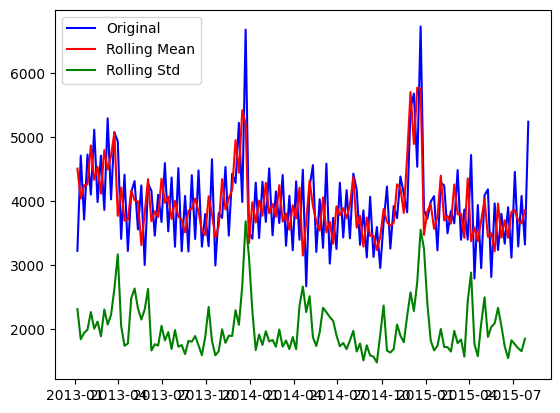

Results of Dickey-Fuller Test:
ADF Statistic: -4.374784
p-value: 0.000329
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583


In [37]:
#Testing stationarity of store type b
test_stationarity(sales_c)

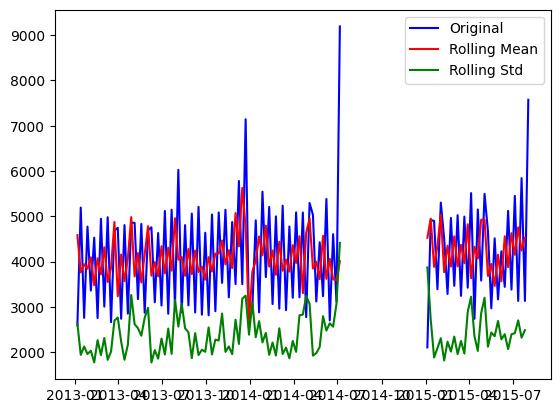

Results of Dickey-Fuller Test:
ADF Statistic: -6.237461
p-value: 0.000000
Critical Values:
1% -3.4392539652094154
5% -2.86546960465041
10% -2.5688625527782327


In [38]:
#Testing stationarity of store type d
test_stationarity(sales_d)

In [39]:
# Plotting seasonality and trend
def plot_timeseries(sales,StoreType):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition= seasonal_decompose(sales, model = 'additive',period=365)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');

    plt.title('Decomposition Plots')

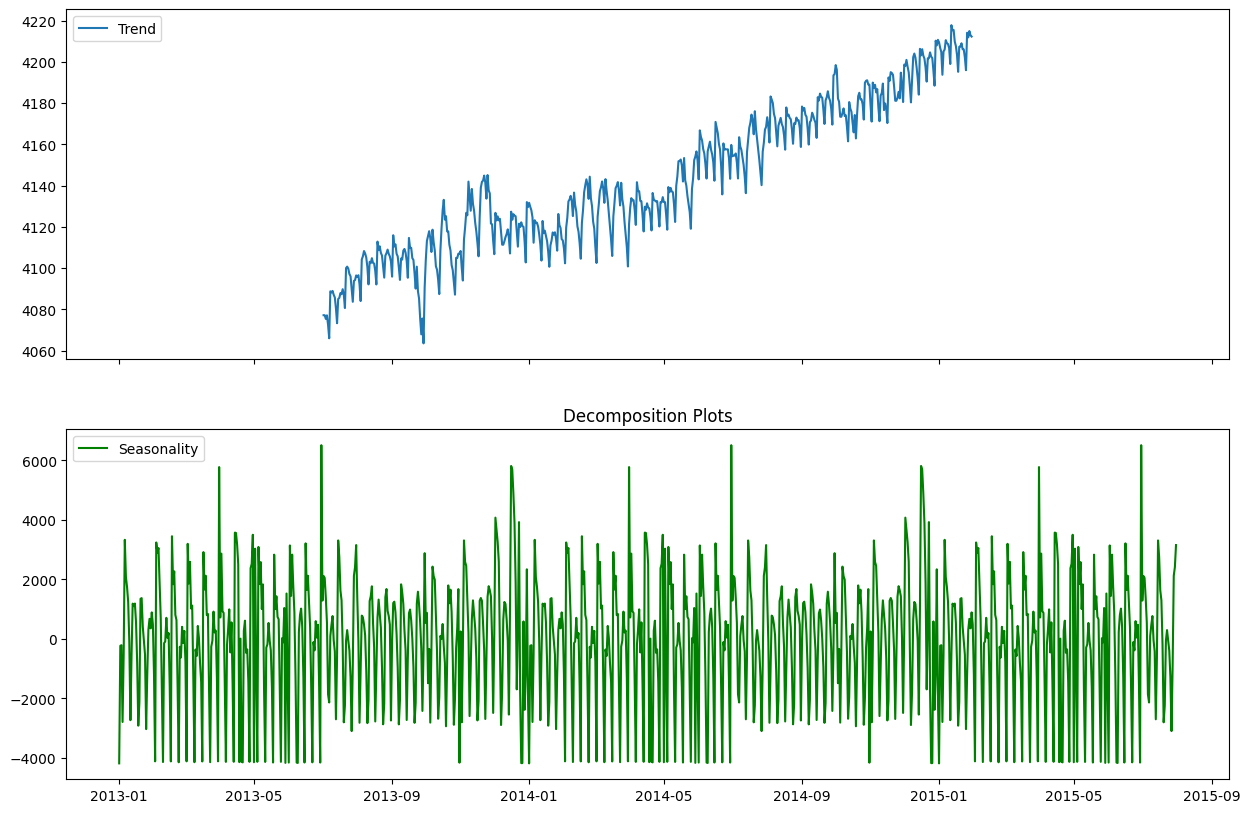

In [40]:
# Plotting seasonality and trend for store type a
plot_timeseries(sales_a,'a')

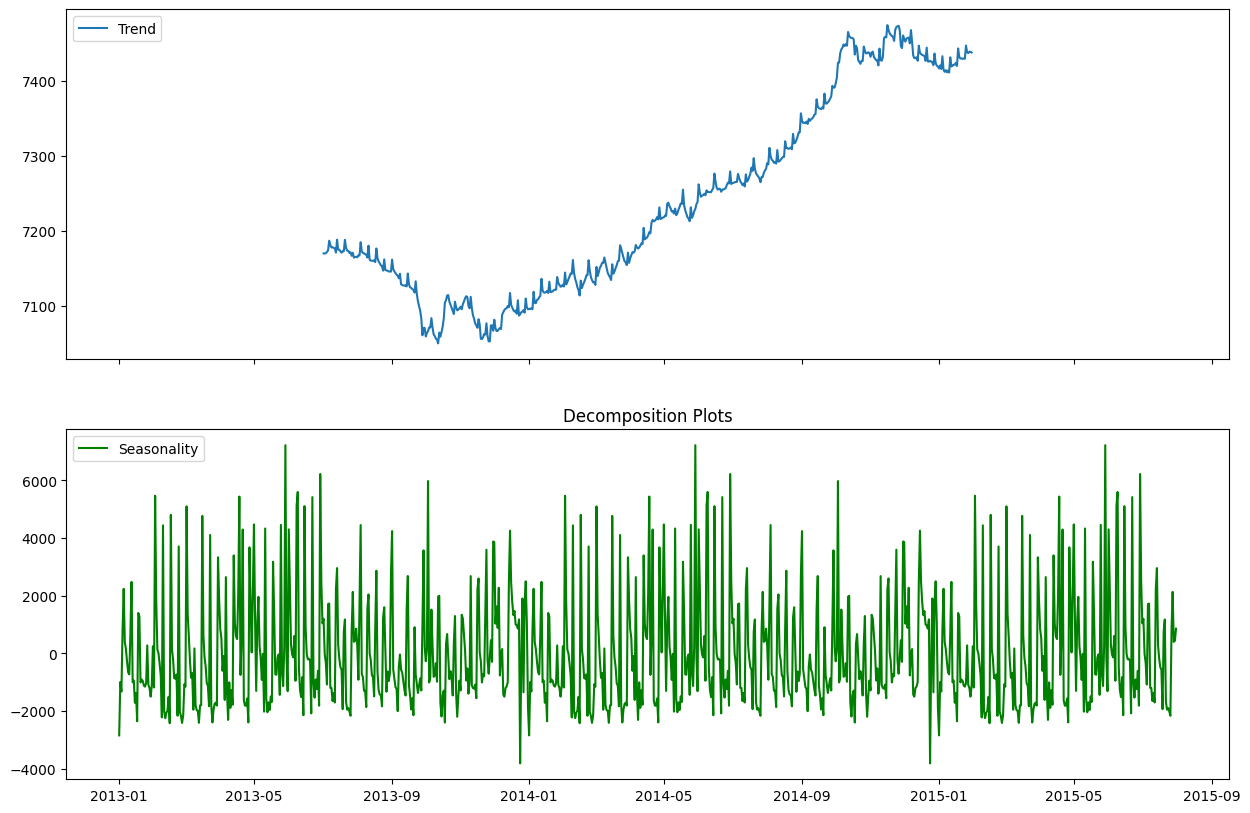

In [41]:
# Plotting seasonality and trend for store type b
plot_timeseries(sales_b,'b')

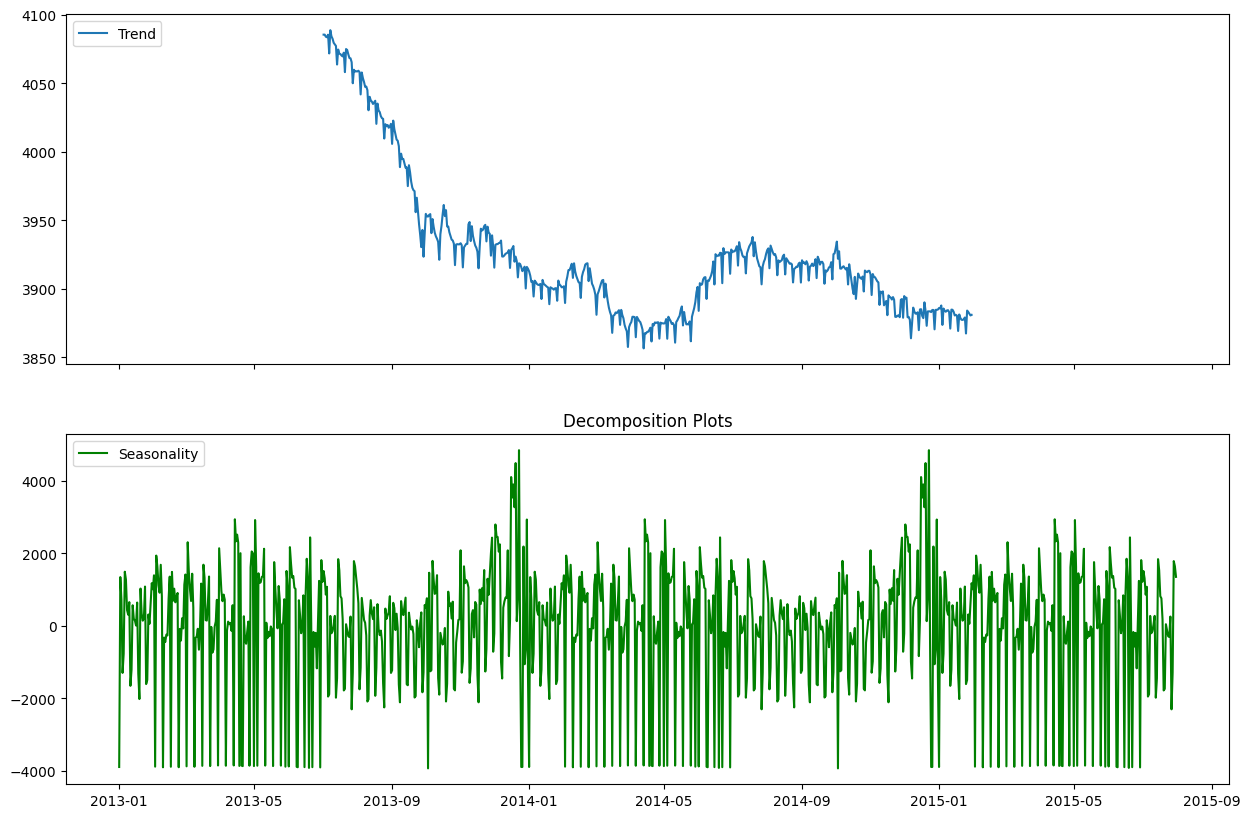

In [42]:
# Plotting seasonality and trend for store type c
plot_timeseries(sales_c,'c')

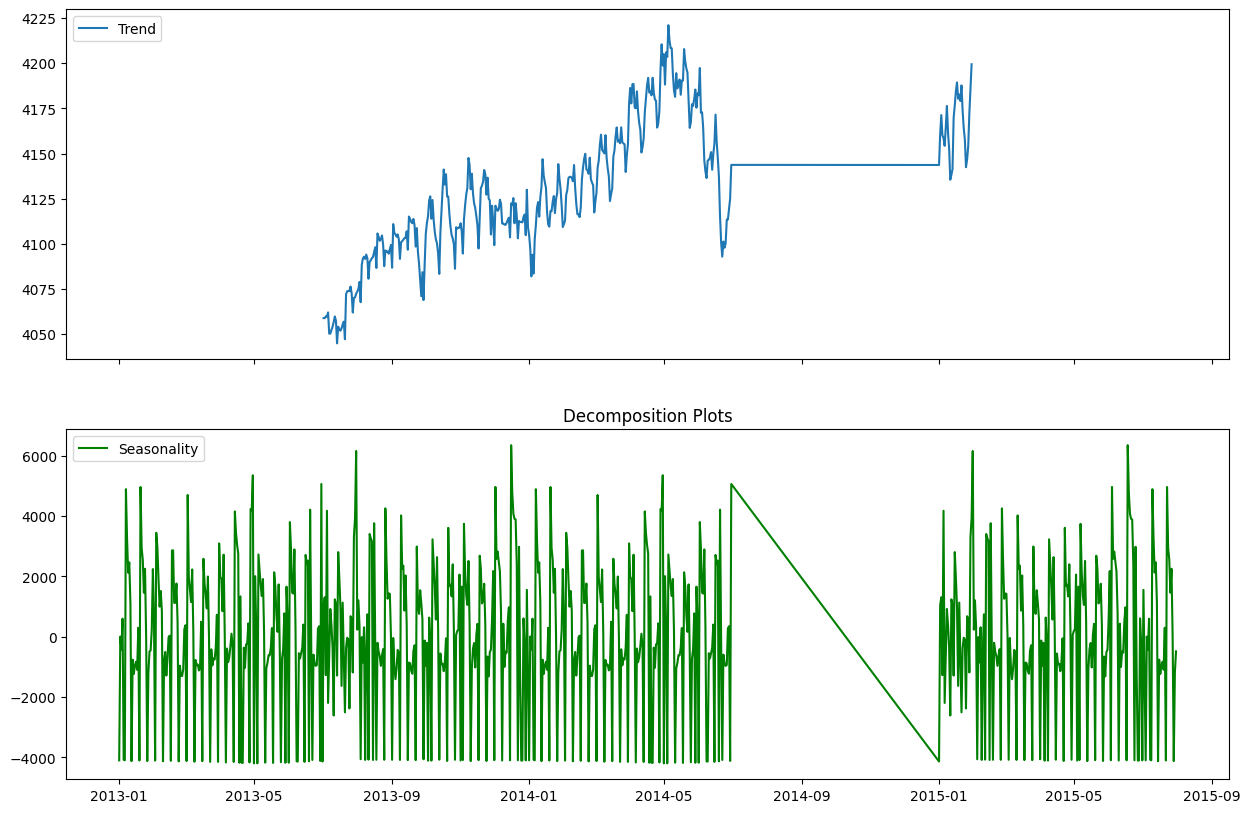

In [43]:
# Plotting seasonality and trend for store type d
plot_timeseries(sales_d,'d')

## Forecastiing Time Series

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf

In [45]:
# Autocorrelation function to make ACF and PACF graphs
def auto_corr(sales):
    lag_acf = acf(sales,nlags=30)
    lag_pacf = pacf(sales,nlags=20,method='ols')
  
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('ACF')
    
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('PACF')

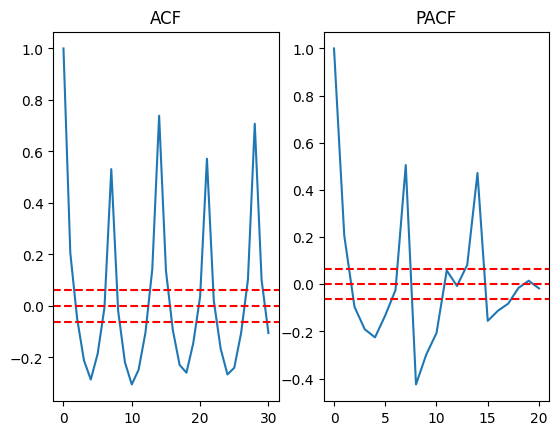

In [46]:
# ACF and PACF for store type a
auto_corr(sales_a)

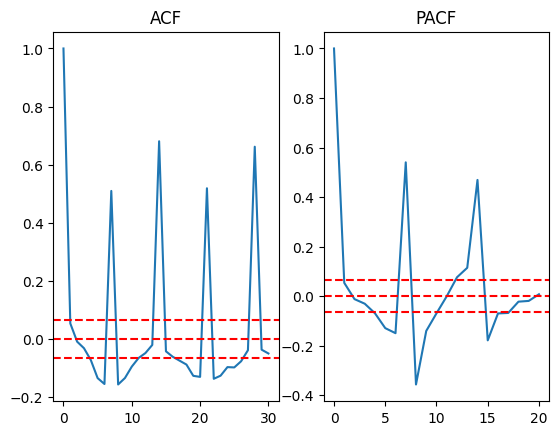

In [47]:
# ACF and PACF for store type b
auto_corr(sales_b)

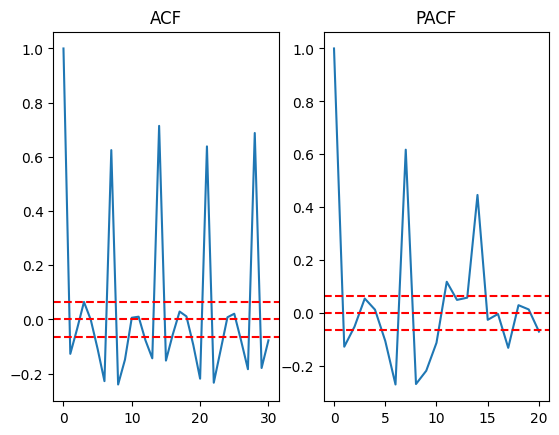

In [48]:
# ACF and PACF for store type c
auto_corr(sales_c)

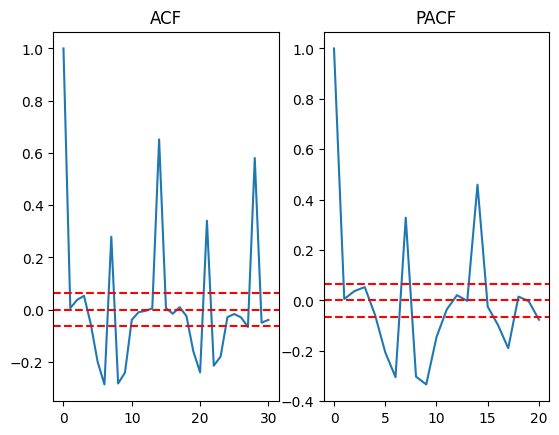

In [49]:
# ACF and PACF for store type d
auto_corr(sales_d)

<Axes: xlabel='Date'>

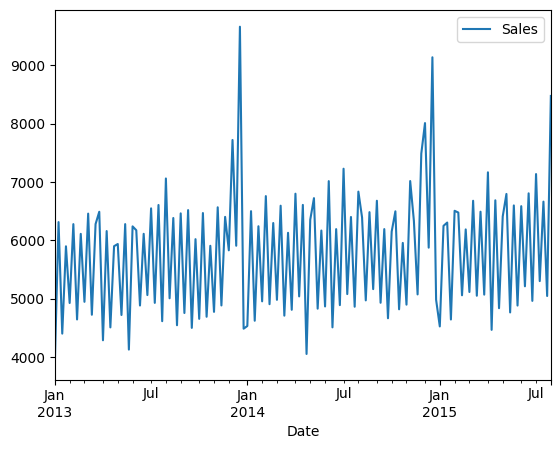

In [50]:
train_arima = train.drop("StateHoliday", axis=1).resample("W").mean() 
train_arima = train_arima[["Sales"]]
train_arima.plot()

# train.info()

In [4]:
import itertools

In [52]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [5]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(e)
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2708.8196371542945
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2357.2039807693754
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2142.9121481207667
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1893.8220522796303
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2163.085669279766
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2116.7057912673763
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1919.9439695857754
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1894.952410740943
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2592.336694341315
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2305.886830503303
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2103.0171891135683
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1856.6353259662178
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2146.0426171360764


C:\Users\snehi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2066.9085973607844
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1902.441508975218
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1852.884184254738
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2368.481953362583
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2154.580453193165
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2260.8043078555966
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1964.6461888083802
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2173.1767302435214
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2156.2675245503656
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2023.1445509589187
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1961.840648797977
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2214.8326894486017
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2015.9040261425214
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2133.477270742583
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1836.4691548473154
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2049.525694026266
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2017.4103403296826
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1912.1063563724729

In [55]:
# Fitting the data to SARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(train_arima,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_sarima = model_sarima.fit()

print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5251      0.103     -5.091      0.000      -0.727      -0.323
ma.L1         -0.9559      0.050    -19.076      0.000      -1.054      -0.858
ma.S.L12      -1.0120      0.831     -1.218      0.223      -2.640       0.616
sigma2      8.268e+05   7.31e+05      1.131      0.258   -6.06e+05    2.26e+06


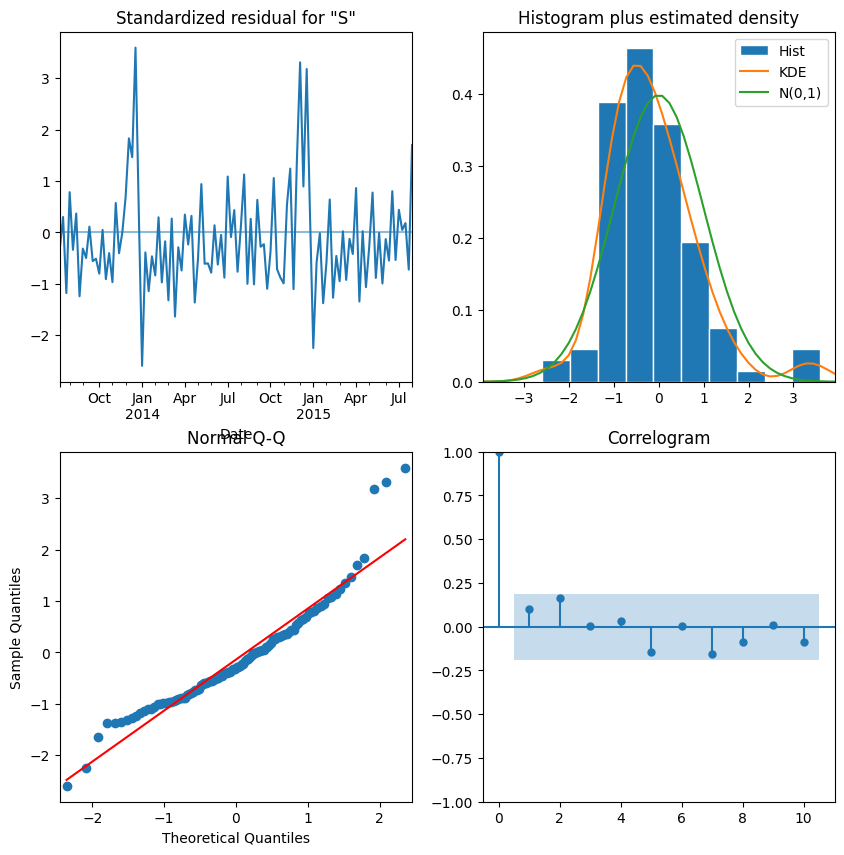

In [56]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.show()

In [6]:
from math import sqrt

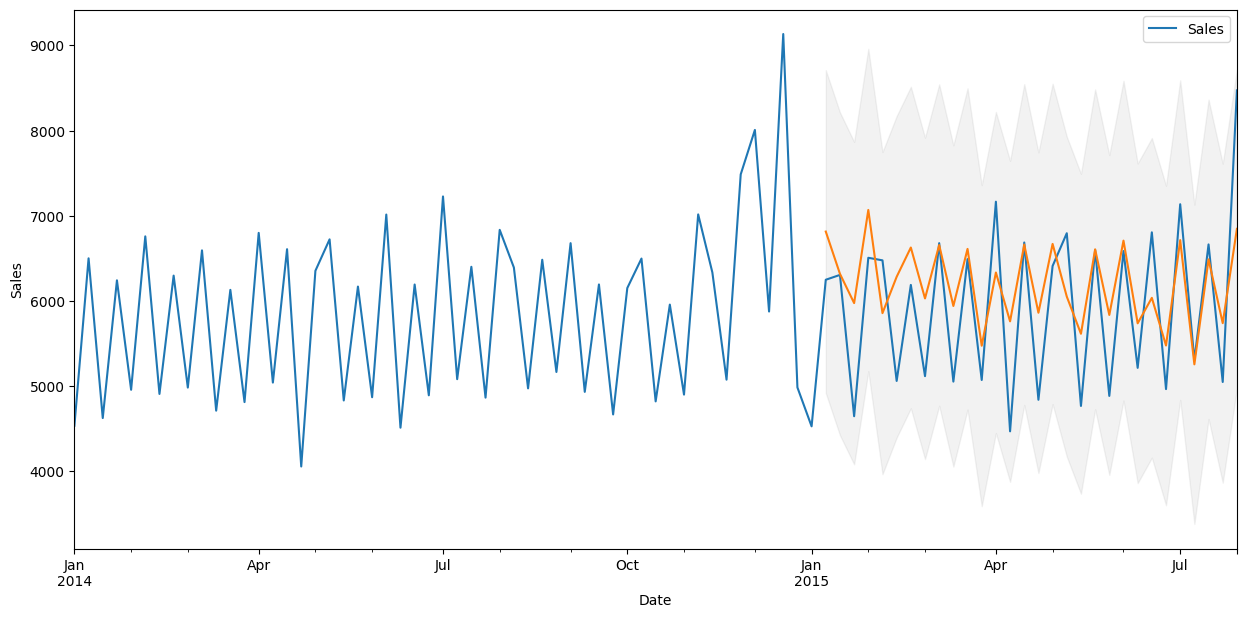

Root Mean Squared Error:  739.0611638969419


In [58]:
# Model Prediction and validation 
# Predictions are performed for the 11th Jan' 2015 onwards of the train data.

pred = results_sarima.get_prediction(start=pd.to_datetime('2015-01-11'), dynamic = False) 

# Get confidence intervals of forecasts
pred_ci = pred.conf_int() 

ax = train_arima["2014":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend
plt.show()

train_arima_forecasted = pred.predicted_mean
train_arima_truth = train_arima["2015-01-11":]

# Calculating the error
rms_arima = sqrt(mean_squared_error(train_arima_truth, train_arima_forecasted))
print("Root Mean Squared Error: ", rms_arima)

## Prophet Model

In [59]:
# Creating a train dataset
train_prophet = train.copy()
train_prophet.reset_index(level=0, inplace=True)

In [60]:
# Converting col names to specific names as required by Prophet library
train_prophet = train_prophet.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
train_prophet.head()

,ds,Store,DayOfWeek,y,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
0,2015-07-31,1,5,5263.0,555,1,1,0,1,2015,7,31,31,9.482883
1,2015-07-31,2,5,6064.0,625,1,1,0,1,2015,7,31,31,9.702400
2,2015-07-31,3,5,8314.0,821,1,1,0,1,2015,7,31,31,10.126675
3,2015-07-31,4,5,13995.0,1498,1,1,0,1,2015,7,31,31,9.342457
4,2015-07-31,5,5,4822.0,559,1,1,0,1,2015,7,31,31,8.626118


In [61]:
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet.drop('StateHoliday', axis=1).set_index("ds").resample("W").sum().reset_index()
ts_week_prophet.head()

,ds,Store,DayOfWeek,y,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
0,2013-01-06,3732032,30103,26129335.0,3110602,4471,0,4533,13464957,6689,23414,6689,39406.143319
1,2013-01-13,4355190,31220,49275222.0,5226350,6649,5575,560,15711465,7805,78050,15610,65076.326540
2,2013-01-20,4355190,31220,34377765.0,4205743,6654,0,0,15711465,7805,132685,23415,57208.229656
3,2013-01-27,4355190,31220,46040169.0,4928833,6665,5575,0,15711465,7805,187320,31220,65073.831993
4,2013-02-03,4355190,31220,38466029.0,4507650,6667,0,128,15711465,11150,138260,39025,59686.174407


In [7]:
from prophet import Prophet

C:\Users\snehi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
ts_week_prophet_train = ts_week_prophet[["ds", "y"]]
ts_week_prophet_train

,ds,y
0,2013-01-06,26129335.0
1,2013-01-13,49275222.0
2,2013-01-20,34377765.0
3,2013-01-27,46040169.0
4,2013-02-03,38466029.0
...,...,...
130,2015-07-05,55690481.0
131,2015-07-12,41391282.0
132,2015-07-19,52008419.0
133,2015-07-26,39402115.0


In [65]:
# Fitting data to Prophet model
prophet_1 = Prophet() 
prophet_1.fit(ts_week_prophet_train)

future_1 = prophet_1.make_future_dataframe(periods = 52, freq = "W") 
forecast_1 = prophet_1.predict(future_1)

forecast_1[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail() 

08:20:49 - cmdstanpy - INFO - Chain [1] start processing
08:20:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
182,2016-07-03,4.445992e+07,3.465652e+07,5.406352e+07
183,2016-07-10,4.410754e+07,3.521416e+07,5.395483e+07
184,2016-07-17,4.435099e+07,3.540973e+07,5.456361e+07
185,2016-07-24,4.423843e+07,3.421771e+07,5.374046e+07
186,2016-07-31,4.344689e+07,3.473293e+07,5.331275e+07


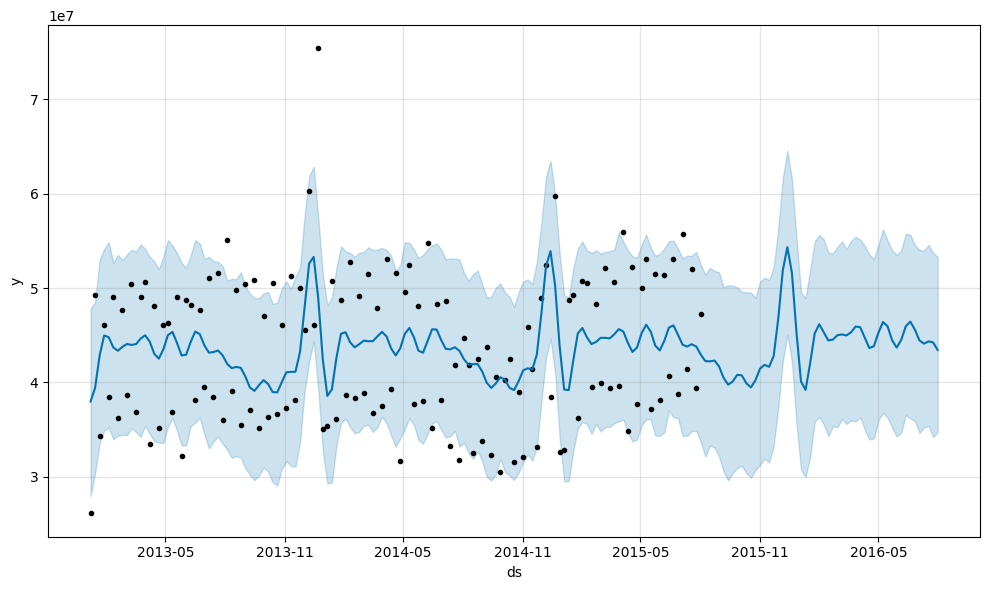

In [66]:
# Visualizing predicions of forecast
prophet_1.plot(forecast_1);

In [67]:
# Checking the RMSE of Prophet model
metric_prophet_1 = forecast_1.set_index('ds')[['yhat']].join(ts_week_prophet_train.set_index('ds').y).reset_index()
metric_prophet_1.dropna(inplace=True)
rms_prophet_1 = mean_squared_error(metric_prophet_1.y, metric_prophet_1.yhat)
rms_prophet_1

53782508832222.18

In [68]:
# Encoding state holiday categorical variable
train_prophet["StateHoliday_cat"] = train_prophet["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})

In [69]:
# Choosing only required cols
train_prophet = train_prophet[['ds', 'y', 'SchoolHoliday', 'StateHoliday_cat']]
train_prophet.head()

,ds,y,SchoolHoliday,StateHoliday_cat
0,2015-07-31,5263.0,1,0
1,2015-07-31,6064.0,1,0
2,2015-07-31,8314.0,1,0
3,2015-07-31,13995.0,1,0
4,2015-07-31,4822.0,1,0


In [70]:
# Modelling holidays - creating holidays dataframe
state_dates = train_prophet[(train_prophet.StateHoliday_cat == 1)].loc[:, "ds"].values
school_dates = train_prophet[(train_prophet.SchoolHoliday == 1)].loc[:, "ds"].values

state = pd.DataFrame({"holiday": "state_holiday",  "ds": pd.to_datetime(state_dates)})
school = pd.DataFrame({"holiday": "school_holiday", "ds": pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [71]:
# Dropping holiday columns because not needed any more
train_prophet_clean = train_prophet.drop(["SchoolHoliday", "StateHoliday_cat"], axis = 1)
train_prophet_clean.head()

,ds,y
0,2015-07-31,5263.0
1,2015-07-31,6064.0
2,2015-07-31,8314.0
3,2015-07-31,13995.0
4,2015-07-31,4822.0


In [72]:
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet_clean.set_index("ds").resample("W").sum()
ts_week_prophet.head()

,y
ds,
2013-01-06,26129335.0
2013-01-13,49275222.0
2013-01-20,34377765.0
2013-01-27,46040169.0
2013-02-03,38466029.0


In [73]:
# Resetting the index
ts_week_prophet_train = ts_week_prophet.reset_index()
ts_week_prophet_train.head()

,ds,y
0,2013-01-06,26129335.0
1,2013-01-13,49275222.0
2,2013-01-20,34377765.0
3,2013-01-27,46040169.0
4,2013-02-03,38466029.0


In [74]:
# Fitting data to Prophet model
prophet_2 = Prophet(holidays = holidays, interval_width = 0.95, growth='linear', yearly_seasonality = True) 
prophet_2.fit(ts_week_prophet_train)
print("done")

future_2 = prophet_2.make_future_dataframe(periods = 52, freq = "W") 
forecast_2 = prophet_2.predict(future_2)

forecast_2[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

08:21:58 - cmdstanpy - INFO - Chain [1] start processing
08:21:58 - cmdstanpy - INFO - Chain [1] done processing


done


,ds,yhat,yhat_lower,yhat_upper
182,2016-07-03,4.414442e+07,3.064700e+07,5.772750e+07
183,2016-07-10,4.383900e+07,2.980131e+07,5.721662e+07
184,2016-07-17,4.410804e+07,3.077658e+07,5.816044e+07
185,2016-07-24,4.412119e+07,2.994034e+07,5.902176e+07
186,2016-07-31,4.352280e+07,2.917790e+07,5.747736e+07


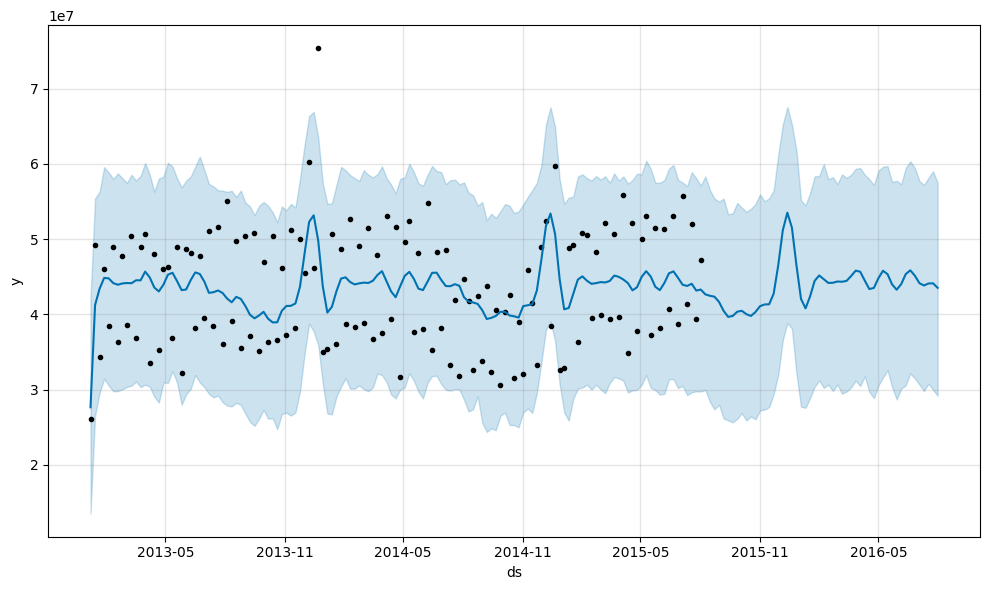

In [75]:
# Visualizing predicions of forecast
prophet_2.plot(forecast_2);

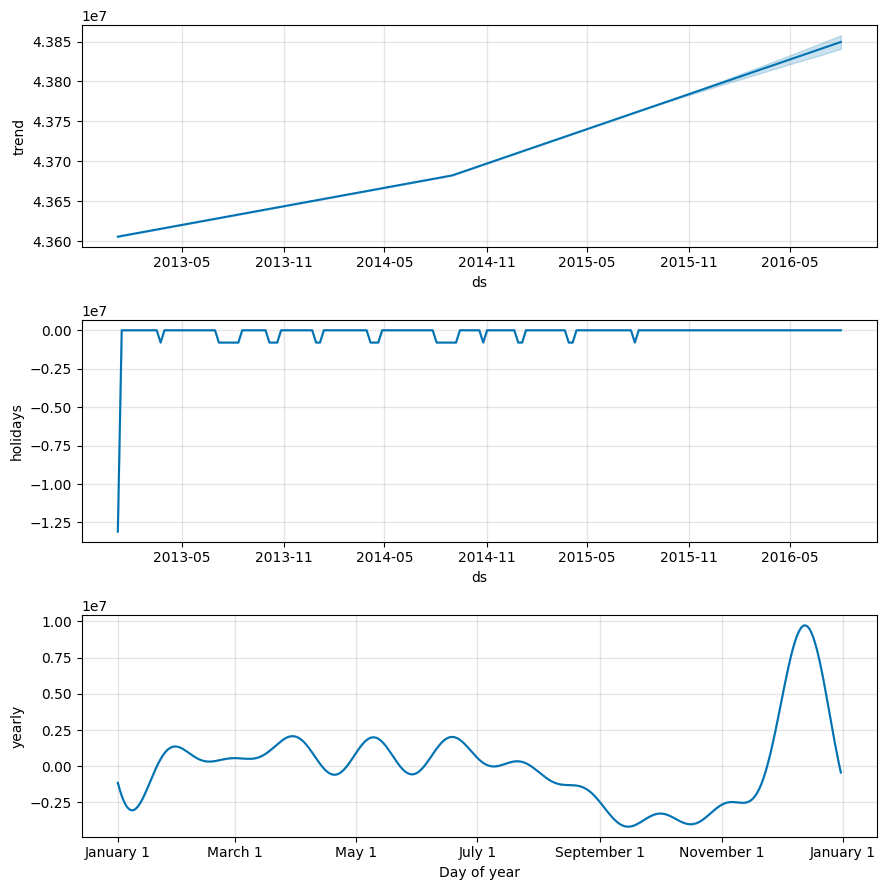

In [76]:
# Visualizing trend and seasonality components
prophet_2.plot_components(forecast_2);

In [77]:
# Checking the RMSE of Prophet model
metric_prophet_2 = forecast_2.set_index('ds')[['yhat']].join(ts_week_prophet_train.set_index('ds').y).reset_index()
metric_prophet_2.dropna(inplace=True)
rms_prophet_2 = mean_squared_error(metric_prophet_2.y, metric_prophet_2.yhat)
rms_prophet_2

52478331655685.23

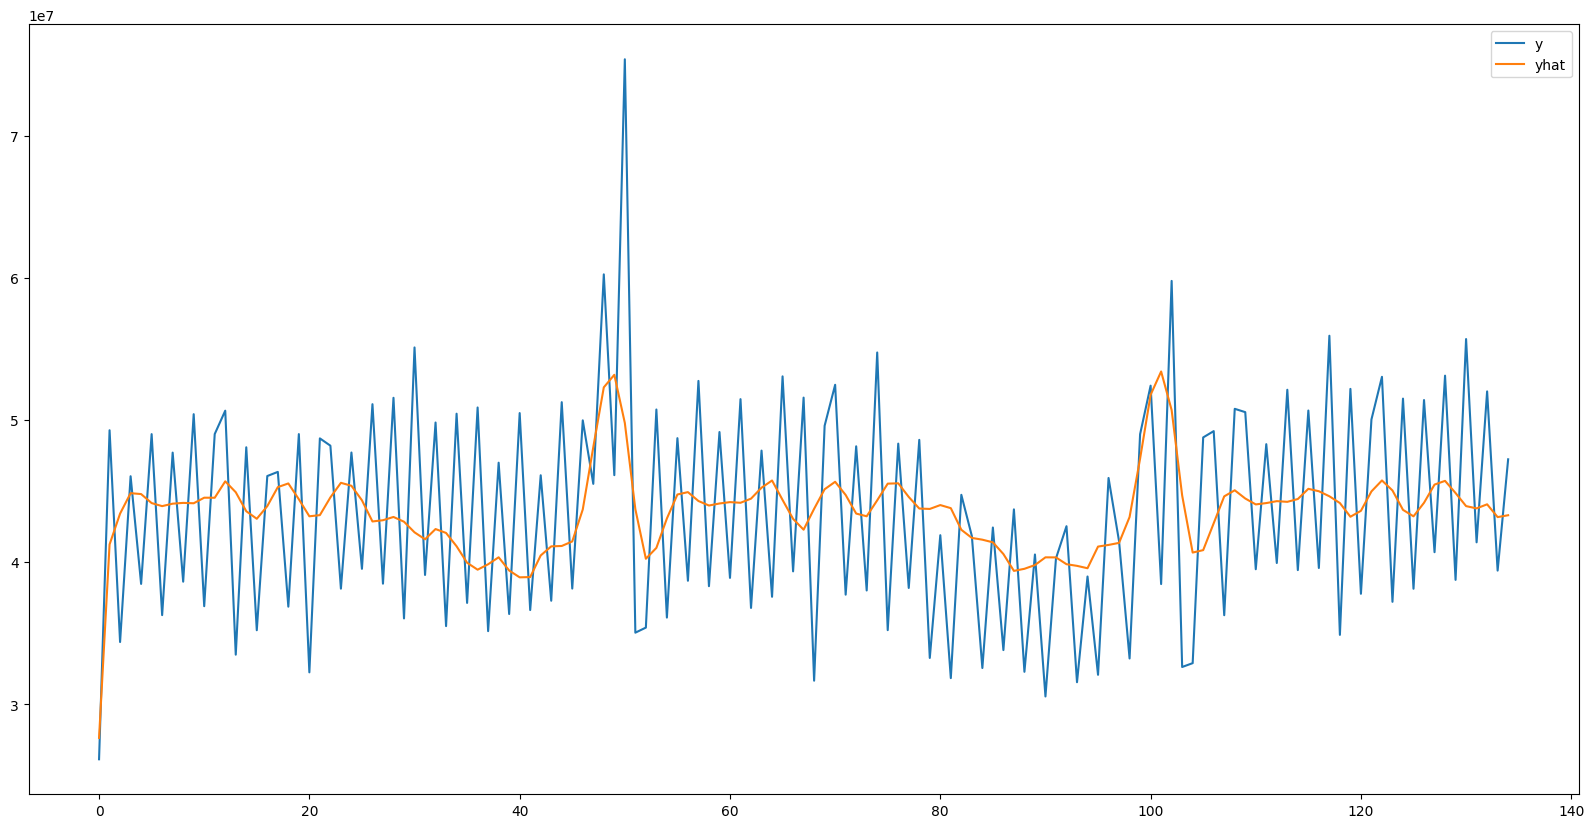

In [78]:
# Visualizing the performance of model
plt.figsize=(10,20)
metric_prophet_2["y"].plot(figsize=(20,10))
metric_prophet_2["yhat"].plot()
plt.legend()
plt.show()

## XGBoost Model

In [109]:
# Dropping Customers and Sale per customer
ts_xgboost = train_store_joined.copy()
ts_xgboost = ts_xgboost.drop(['Customers', 'SalePerCustomer'], axis=1)

In [110]:
# Combining similar columns into one column and dropping old columns
ts_xgboost['CompetitionOpen'] = 12 * (ts_xgboost.Year - ts_xgboost.CompetitionOpenSinceYear) + (ts_xgboost.Month - ts_xgboost.CompetitionOpenSinceMonth)
ts_xgboost['PromoOpen'] = 12 * (ts_xgboost.Year - ts_xgboost.Promo2SinceYear) + (ts_xgboost.WeekOfYear - ts_xgboost.Promo2SinceWeek) / 4.0
ts_xgboost = ts_xgboost.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)
ts_xgboost = ts_xgboost.drop(["Promo2SinceWeek", "Promo2SinceYear"], axis = 1)

In [111]:
# Converting categorical cols to numerical cols and removing old cols
mappings = {0:0, "0": 0, "a": 1, "b": 1, "c": 1}
ts_xgboost["StateHoliday_cat"] = ts_xgboost["StateHoliday"].map(mappings)
ts_xgboost["StoreType_cat"] = ts_xgboost["StoreType"].map(mappings)
ts_xgboost["Assortment_cat"] = ts_xgboost["Assortment"].map(mappings)

ts_xgboost = ts_xgboost.drop(["StateHoliday", "StoreType", "Assortment"], axis = 1)

In [112]:
# Splitting the data
features = ts_xgboost.drop(["Sales"], axis = 1)
target = ts_xgboost["Sales"]
features['WeekOfYear'] = features['WeekOfYear'].astype({"WeekOfYear": "int32"})

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.20) 

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Open                 1017209 non-null  int64  
 3   Promo                1017209 non-null  int64  
 4   SchoolHoliday        1017209 non-null  int64  
 5   Year                 1017209 non-null  int32  
 6   Month                1017209 non-null  int32  
 7   Day                  1017209 non-null  int32  
 8   WeekOfYear           1017209 non-null  int32  
 9   CompetitionDistance  1017209 non-null  float64
 10  Promo2               1017209 non-null  int64  
 11  PromoInterval        1017209 non-null  int8   
 12  CompetitionOpen      1017209 non-null  float64
 13  PromoOpen            1017209 non-null  Float64
 14  StateHoliday_cat     131072 non-null   float64
 15

In [8]:
import xgboost as xgb

In [114]:
# Tuning parameters - using default metrics
params = {'max_depth':6, "booster": "gbtree", 'eta':0.3, 'objective':'reg:squarederror'} 

dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Training the model
xgboost = xgb.train(params, dtrain, 100, evals=watchlist,early_stopping_rounds= 100, verbose_eval=True)
         
# Making predictions
preds = xgboost.predict(dtest)

[0]	train-rmse:5160.59160	eval-rmse:5173.23317
[1]	train-rmse:4001.97278	eval-rmse:4012.53049
[2]	train-rmse:3273.98372	eval-rmse:3284.65317
[3]	train-rmse:2844.26856	eval-rmse:2854.13203
[4]	train-rmse:2593.42894	eval-rmse:2602.96147
[5]	train-rmse:2456.37775	eval-rmse:2464.77363
[6]	train-rmse:2382.23864	eval-rmse:2390.25953
[7]	train-rmse:2298.93801	eval-rmse:2306.27210
[8]	train-rmse:2268.01252	eval-rmse:2274.72759
[9]	train-rmse:2234.74500	eval-rmse:2241.36391
[10]	train-rmse:2199.52414	eval-rmse:2205.66502
[11]	train-rmse:2164.57184	eval-rmse:2170.18989
[12]	train-rmse:2138.55883	eval-rmse:2144.73072
[13]	train-rmse:2125.63497	eval-rmse:2131.92424
[14]	train-rmse:2084.18332	eval-rmse:2092.27475
[15]	train-rmse:2035.71888	eval-rmse:2042.43364
[16]	train-rmse:2025.70175	eval-rmse:2032.64300
[17]	train-rmse:2015.01346	eval-rmse:2022.27166
[18]	train-rmse:1957.82063	eval-rmse:1964.07028
[19]	train-rmse:1952.64707	eval-rmse:1958.74003
[20]	train-rmse:1916.56070	eval-rmse:1921.88539
[2

In [115]:
# RMSE of model
rms_xgboost = sqrt(mean_squared_error(y_test, preds))
print("Root Mean Squared Error for XGBoost:", rms_xgboost)

Root Mean Squared Error for XGBoost: 1197.0776149405756


In [116]:
# Tuning parameters
params_2 = {'max_depth':10, 'eta':0.1,  'gamma': 2}

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Training the model
xgboost_2 = xgb.train(params_2, dtrain, 100, evals=watchlist,early_stopping_rounds= 100, verbose_eval=True)
         
# Making predictions
preds_2 = xgboost_2.predict(dtest)

[0]	train-rmse:6316.54095	eval-rmse:6329.86232
[1]	train-rmse:5763.30718	eval-rmse:5776.10238
[2]	train-rmse:5273.12909	eval-rmse:5286.02938
[3]	train-rmse:4840.85658	eval-rmse:4853.90953
[4]	train-rmse:4458.23206	eval-rmse:4471.72123
[5]	train-rmse:4120.35533	eval-rmse:4134.29976
[6]	train-rmse:3822.72642	eval-rmse:3836.95444
[7]	train-rmse:3557.60966	eval-rmse:3571.98722
[8]	train-rmse:3327.11811	eval-rmse:3341.25838
[9]	train-rmse:3125.27089	eval-rmse:3139.76597
[10]	train-rmse:2952.39707	eval-rmse:2967.21398
[11]	train-rmse:2804.54436	eval-rmse:2819.71735
[12]	train-rmse:2676.65317	eval-rmse:2692.13493
[13]	train-rmse:2565.15243	eval-rmse:2580.62809
[14]	train-rmse:2469.95468	eval-rmse:2485.57641
[15]	train-rmse:2391.35993	eval-rmse:2407.25456
[16]	train-rmse:2305.50762	eval-rmse:2322.30634
[17]	train-rmse:2249.56835	eval-rmse:2266.77974
[18]	train-rmse:2181.98223	eval-rmse:2199.65419
[19]	train-rmse:2136.66215	eval-rmse:2154.83922
[20]	train-rmse:2101.47520	eval-rmse:2120.13149
[2

In [117]:
# RMSE of model
rms_xgboost_2 = sqrt(mean_squared_error(y_test, preds_2))
print("Root Mean Squared Error for XGBoost:", rms_xgboost_2)

Root Mean Squared Error for XGBoost: 1102.1020279038767


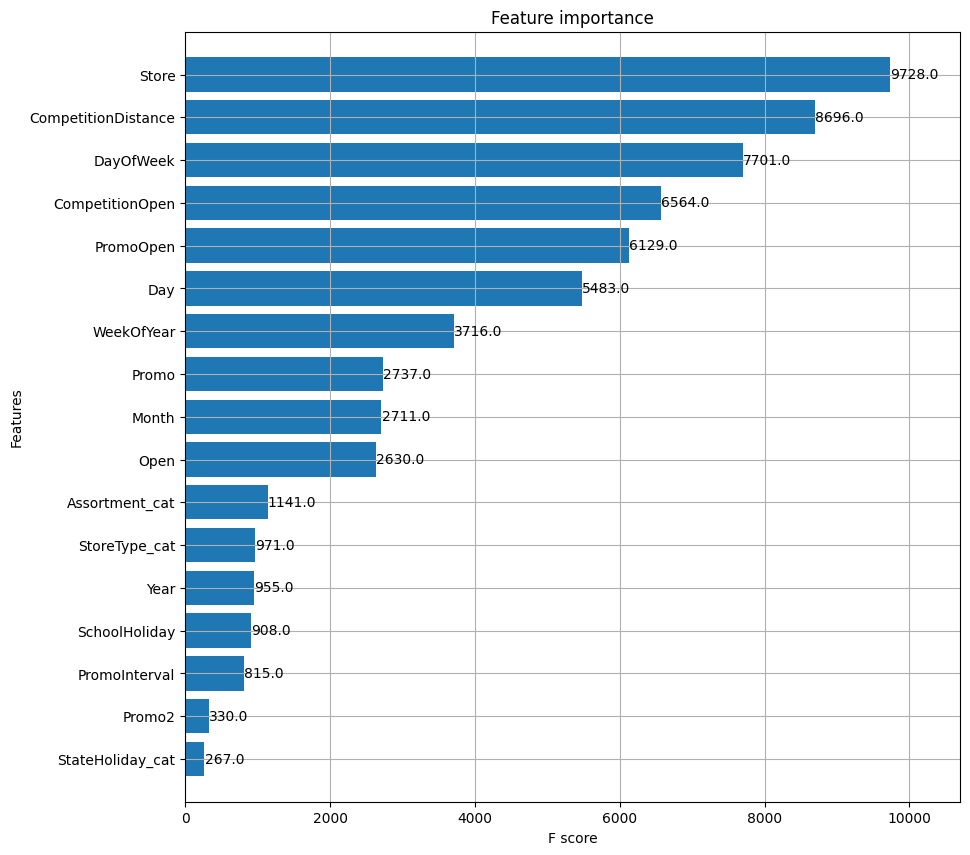

In [118]:
# Let's see the feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgboost_2, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Result

In [119]:
# Comparing performance of above three models - through RMSE
rms_arima = format(float(rms_arima))
rms_prophet_2 = format(float(rms_prophet_2))
rms_xgboost_2 = format(float(rms_xgboost_2))

model_errors = pd.DataFrame({
    "Model": ["SARIMA", "Prophet", "XGBoost"],
    "RMSE": [rms_arima, rms_prophet_2, rms_xgboost_2]
})

model_errors.sort_values(by = "RMSE")

,Model,RMSE
2,XGBoost,1102.1020279038767
1,Prophet,52478331655685.23
0,SARIMA,739.0611638969419
